In [ ]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1])

def hT(z):
    return 1 / (1 + np.exp(-z))

print("x: ", x)
print("y: ", y)


x:  [1 2 3 4 5]
y:  [0 0 0 1 1]


In [ ]:
b0 = 0.0
b1 = 0.0

z = b0 + b1 * x
p = hT(z)

print("z:", z)
print("H Theta:", p)


z: [0. 0. 0. 0. 0.]
H Theta: [0.5 0.5 0.5 0.5 0.5]


In [ ]:
JB = 0
m = 5
for i in range(m):
    JB += (y[i] * np.log10(p[i]) + (1 - y[i]) * np.log10(1 - p[i]))
    print(f"pass : {i}, y : {y[i]}, hT : {p[i]}, y[i] * np.log(p[i]) : {y[i] * np.log(p[i]):.2f}, (1 - y[i]) * np.log(1 - p[i]) : {(1 - y[i]) * np.log(1 - p[i]):.2f}")

JB = -(1/m) * JB
print(f"JB : {JB}")

pass : 0, y : 0, hT : 0.5, y[i] * np.log(p[i]) : -0.00, (1 - y[i]) * np.log(1 - p[i]) : -0.69
pass : 1, y : 0, hT : 0.5, y[i] * np.log(p[i]) : -0.00, (1 - y[i]) * np.log(1 - p[i]) : -0.69
pass : 2, y : 0, hT : 0.5, y[i] * np.log(p[i]) : -0.00, (1 - y[i]) * np.log(1 - p[i]) : -0.69
pass : 3, y : 1, hT : 0.5, y[i] * np.log(p[i]) : -0.69, (1 - y[i]) * np.log(1 - p[i]) : -0.00
pass : 4, y : 1, hT : 0.5, y[i] * np.log(p[i]) : -0.69, (1 - y[i]) * np.log(1 - p[i]) : -0.00
JB : 0.30102999566398125


In [ ]:
GB0 = 0
GB1 = 0
for i in range(m):
  GB0 += (p[i]-y[i])

GB0 = (1/m) * GB0

for i in range(m):
  GB1 += (p[i]-y[i])*x[i]

GB1 = (1/m) * GB1

print(f"GB0 : {GB0:.4f}, GB1 : {GB1:.4f}")

GB0 : 0.1000, GB1 : -0.3000


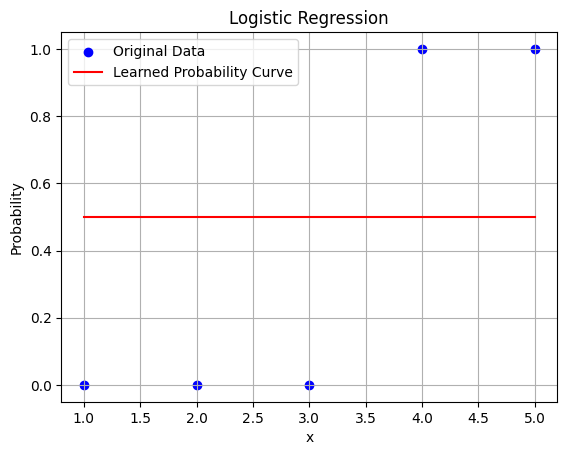

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, label='Original Data', color='blue')

x_curve = np.linspace(x.min(), x.max(), 100)
z_curve = b0 + b1 * x_curve
p_curve = hT(z_curve)
plt.plot(x_curve, p_curve, label='Learned Probability Curve', color='red')

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
A = 0.1
b0 = b0 - A*GB0
b1 = b1 - A*GB1
print(f"B0 updated : {b0}, B1 updated : {b1}")

B0 updated : -0.010000000000000002, B1 updated : 0.030000000000000006


In [ ]:
z = b0 + b1 * x
p = hT(z)

print("z:", z)
print("H Theta:", p)

z: [0.02 0.05 0.08 0.11 0.14]
H Theta: [0.50499983 0.5124974  0.51998934 0.5274723  0.53494295]


In [ ]:
JB = 0
m = 5
for i in range(m):
    JB += (y[i] * np.log10(p[i]) + (1 - y[i]) * np.log10(1 - p[i]))
    print(f"pass : {i}, y : {y[i]}, hT : {p[i]:.4f}, y[i] * np.log(p[i]) : {y[i] * np.log(p[i]):.2f}, (1 - y[i]) * np.log(1 - p[i]) : {(1 - y[i]) * np.log(1 - p[i]):.2f}")

JB = -(1/m) * JB
print(f"JB : {JB:.4f}")

pass : 0, y : 0, hT : 0.5050, y[i] * np.log(p[i]) : -0.00, (1 - y[i]) * np.log(1 - p[i]) : -0.70
pass : 1, y : 0, hT : 0.5125, y[i] * np.log(p[i]) : -0.00, (1 - y[i]) * np.log(1 - p[i]) : -0.72
pass : 2, y : 0, hT : 0.5200, y[i] * np.log(p[i]) : -0.00, (1 - y[i]) * np.log(1 - p[i]) : -0.73
pass : 3, y : 1, hT : 0.5275, y[i] * np.log(p[i]) : -0.64, (1 - y[i]) * np.log(1 - p[i]) : -0.00
pass : 4, y : 1, hT : 0.5349, y[i] * np.log(p[i]) : -0.63, (1 - y[i]) * np.log(1 - p[i]) : -0.00
JB : 0.2971
